** Import the necessary libraries and load Iris dataset **

In [56]:
%pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [57]:
# Generic
import pandas as pd
import numpy as np

# Generate data set
from sklearn.datasets import load_iris

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the Iris dataset as an example
iris = load_iris()
X = iris.data
print(X.shape)
print(X[:5])

y = iris.target
print(y.shape)
print(y[:-2])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [65]:
# Standardize the Data
X = StandardScaler().fit_transform(X)

# Create dataframe from the standardized data and visulize it in 3D
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(X, columns=col_names)
df['specie'] = [iris.target_names[s] for s in y]  # Add 1 to the specie_id to start from 1

print(df.head())

fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', 
                    z='petal_length',  color='specie')

fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                    margin=dict(l=0, r=0, b=0, t=0))

fig.show()


   sepal_length  sepal_width  petal_length  petal_width  specie
0     -0.900681     1.019004     -1.340227    -1.315444  setosa
1     -1.143017    -0.131979     -1.340227    -1.315444  setosa
2     -1.385353     0.328414     -1.397064    -1.315444  setosa
3     -1.506521     0.098217     -1.283389    -1.315444  setosa
4     -1.021849     1.249201     -1.340227    -1.315444  setosa


In [59]:
# Apply PCA with two components
pca = PCA(n_components=2)
# Fit the model with X and apply the dimensionality reduction on X
# It does all of the heavy liftings and returns the transformed data
X_pca = pca.fit_transform(X)
print(X_pca.shape)
print(X_pca[:5])

(150, 2)
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


In this example, PCA is used to reduce the four original features of the Iris dataset (sepal length, sepal width, petal length, and petal width) into two principal components.

     sepal_length  sepal_width  petal_length  petal_width
PC1      0.271510     0.072548      0.336879     0.319063
PC2      0.142444     0.852475      0.000600     0.004481


<Axes: >

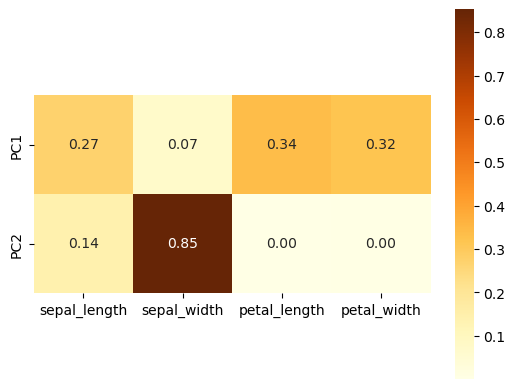

In [60]:
# Let's look at the contributions of variables to
# each principal component with pca.components_** 2. 
# We then use a heat map to showcase this
coefficients = pca.components_** 2
coefficient_matrix = pd.DataFrame(coefficients, columns=col_names, index=['PC1', 'PC2'])

print(coefficient_matrix)
sns.heatmap(coefficient_matrix, cmap='YlOrBr', annot=True, fmt=".2f", square=True)

In our example, we can see that PC1 is made from 27% of sepal_length, 34% of petal_length and 32% of petal_width. PCA2 is primarily dominated by sepal_width.

The reduced data is then visualized in a 2D plot. This demonstrates how dimensionality reduction can simplify data representation while preserving the essential patterns.

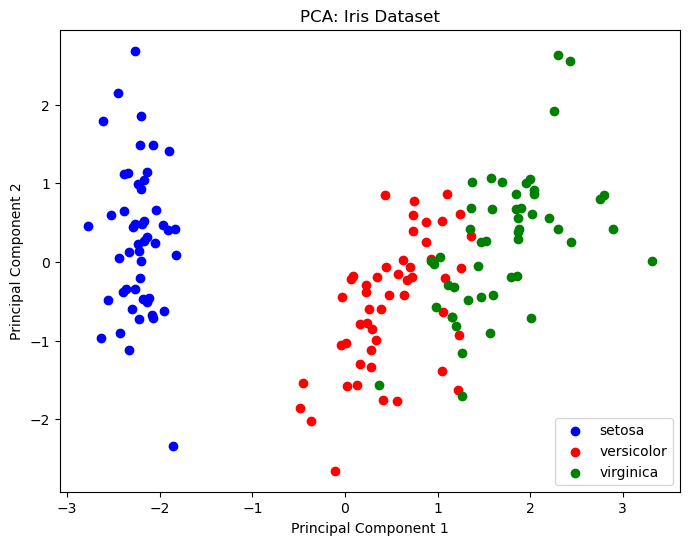

In [68]:
# Plot the results
plt.figure(figsize=(8, 6))
"""
The PCA transformation is stored in the variable `X_pca`, 
and the original labels of the data are stored in `y`.

The `for` loop iterates over the range of the length of `iris.target_names`, 
which represents the number of unique labels or species in the Iris dataset. 
For each iteration, it creates a scatter plot for a specific species.

In the `plt.scatter` function, `X_pca[y == i, 0]` and `X_pca[y == i, 1]` 
are the x and y coordinates of the scatter plot respectively. 
Here, `y == i` is used to filter the rows of `X_pca` for a specific species,
 and `0` and `1` are used to select the first and 
 second columns of `X_pca` respectively. These two columns 
 represent the first two principal components of the data.

The `label` parameter in the `plt.scatter` function is used to 
assign a label to the points in the scatter plot. This label 
is set to the name of the species, which is retrieved 
from `iris.target_names[i]`.

In summary, this code is creating a scatter plot of the first 
two principal components of the Iris dataset, with each species represented 
by a different set of points.
"""
# use colormap
colors = ['blue', 'red', 'green']

for i in range(len(iris.target_names)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=iris.target_names[i],
                color=colors[i])

plt.title('PCA: Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()